In [22]:
import pandas as pd
import numpy as np
import os
from pyampute.exploration.md_patterns import mdPatterns

## Simulated data set

In [2]:
# Load incomplete dataset
props_name = [10, 20, 30, 40, 50]
boston_path = "../../data/toy-dataset/boston-processed/"
biopsy_path = "../../data/toy-dataset/biopsy-processed/"

# Starting with boston dataset
boston_incomp = {}
for p in props_name:
    boston_incomp[p] = pd.read_csv(boston_path + "boston_{}.csv".format(p))


# Followed by biopsy dataset
biopsy_incomp = {}
for p in props_name:
    biopsy_incomp[p] = pd.read_csv(biopsy_path + "biopsy_{}.csv".format(p))

### Boston data set

In [9]:
# Start with continuous variables
boston_num_vars = ["crim", "zn", "indus", "nox", "rm", "age", "dis", 
                   "tax", "ptratio", "black", "lstat", "medv"]

for p in props_name:
    print("p = {}\n".format(p/100))
    print("Mean:\n")
    print(np.round(boston_incomp[p][boston_num_vars].mean(), 2))
    print("\nSD:\n")
    print(np.round(boston_incomp[p][boston_num_vars].std(ddof=1), 2))
    print("\n\n")

p = 0.1

Mean:

crim         3.61
zn          11.36
indus       11.14
nox          0.55
rm           6.28
age         68.57
dis          3.80
tax        408.24
ptratio     18.46
black      356.67
lstat       12.65
medv        22.53
dtype: float64

SD:

crim         8.60
zn          23.32
indus        6.86
nox          0.12
rm           0.70
age         28.15
dis          2.11
tax        168.54
ptratio      2.16
black       91.29
lstat        7.14
medv         9.20
dtype: float64



p = 0.2

Mean:

crim         3.61
zn          11.36
indus       11.14
nox          0.55
rm           6.28
age         68.57
dis          3.80
tax        408.24
ptratio     18.46
black      356.67
lstat       12.65
medv        22.53
dtype: float64

SD:

crim         8.60
zn          23.32
indus        6.86
nox          0.12
rm           0.70
age         28.15
dis          2.11
tax        168.54
ptratio      2.16
black       91.29
lstat        7.14
medv         9.20
dtype: float64



p = 0.3

Mean:

crim      

In [16]:
# Followed by categorical variables
boston_cat_vars = ["chas"]

for c in boston_cat_vars:
    print("Variable: {}\n".format(c))
    for p in props_name:
        print("p = {}\n".format(p/100))
        print(boston_incomp[p][c].value_counts(dropna=False))
        print(np.round(boston_incomp[p][c].value_counts(normalize=True, dropna=False), 3))

Variable: chas

p = 0.1

0.0    455
1.0     33
NaN     18
Name: chas, dtype: int64
0.0    0.899
1.0    0.065
NaN    0.036
Name: chas, dtype: float64
p = 0.2

0.0    435
NaN     41
1.0     30
Name: chas, dtype: int64
0.0    0.860
NaN    0.081
1.0    0.059
Name: chas, dtype: float64
p = 0.3

0.0    416
NaN     65
1.0     25
Name: chas, dtype: int64
0.0    0.822
NaN    0.128
1.0    0.049
Name: chas, dtype: float64
p = 0.4

0.0    386
NaN     96
1.0     24
Name: chas, dtype: int64
0.0    0.763
NaN    0.190
1.0    0.047
Name: chas, dtype: float64
p = 0.5

0.0    363
NaN    120
1.0     23
Name: chas, dtype: int64
0.0    0.717
NaN    0.237
1.0    0.045
Name: chas, dtype: float64


In [6]:
# Number of available entries
for p in props_name:
    print("p = {}\n".format(p/100))
    print(boston_incomp[p].notna().sum())

p = 0.1

crim       506
zn         506
indus      506
chas       488
nox        485
rm         506
age        506
dis        506
tax        506
ptratio    506
black      506
lstat      506
medv       506
dtype: int64
p = 0.2

crim       506
zn         506
indus      506
chas       465
nox        452
rm         506
age        506
dis        506
tax        506
ptratio    506
black      506
lstat      506
medv       506
dtype: int64
p = 0.3

crim       506
zn         506
indus      506
chas       441
nox        430
rm         506
age        506
dis        506
tax        506
ptratio    506
black      506
lstat      506
medv       506
dtype: int64
p = 0.4

crim       506
zn         506
indus      506
chas       410
nox        417
rm         506
age        506
dis        506
tax        506
ptratio    506
black      506
lstat      506
medv       506
dtype: int64
p = 0.5

crim       506
zn         506
indus      506
chas       386
nox        382
rm         506
age        506
dis        506
tax

### biopsy data set

In [11]:
# Start with continuous variables
biopsy_num_vars = ["V1", "V2", "V3", "V4", "V5", "V7", "V8", "V9"]

for p in props_name:
    print("p = {}\n".format(p/100))
    print("Mean:\n")
    print(np.round(biopsy_incomp[p][biopsy_num_vars].mean(), 2))
    print("\nSD:\n")
    print(np.round(biopsy_incomp[p][biopsy_num_vars].std(ddof=1), 2))
    print("\n\n")

p = 0.1

Mean:

V1    4.33
V2    2.96
V3    3.13
V4    2.81
V5    3.22
V7    3.44
V8    2.87
V9    1.59
dtype: float64

SD:

V1    2.78
V2    2.92
V3    2.91
V4    2.86
V5    2.21
V7    2.44
V8    3.05
V9    1.72
dtype: float64



p = 0.2

Mean:

V1    4.16
V2    2.82
V3    3.06
V4    2.81
V5    3.22
V7    3.44
V8    2.87
V9    1.59
dtype: float64

SD:

V1    2.72
V2    2.82
V3    2.87
V4    2.86
V5    2.21
V7    2.44
V8    3.05
V9    1.72
dtype: float64



p = 0.3

Mean:

V1    4.04
V2    2.74
V3    3.08
V4    2.81
V5    3.22
V7    3.44
V8    2.87
V9    1.59
dtype: float64

SD:

V1    2.62
V2    2.79
V3    2.89
V4    2.86
V5    2.21
V7    2.44
V8    3.05
V9    1.72
dtype: float64



p = 0.4

Mean:

V1    3.96
V2    2.70
V3    3.07
V4    2.81
V5    3.22
V7    3.44
V8    2.87
V9    1.59
dtype: float64

SD:

V1    2.60
V2    2.80
V3    2.90
V4    2.86
V5    2.21
V7    2.44
V8    3.05
V9    1.72
dtype: float64



p = 0.5

Mean:

V1    3.90
V2    2.68
V3    3.08
V4    2.81
V5    3.22
V7   

In [17]:
# Followed by categorical variables
biopsy_cat_vars = ["class_malignant"]

for c in biopsy_cat_vars:
    print("Variable: {}\n".format(c))
    for p in props_name:
        print("p = {}\n".format(p/100))
        print(biopsy_incomp[p][c].value_counts(dropna=False))
        print(np.round(biopsy_incomp[p][c].value_counts(normalize=True, dropna=False), 3))

Variable: class_malignant

p = 0.1

0    458
1    241
Name: class_malignant, dtype: int64
0    0.655
1    0.345
Name: class_malignant, dtype: float64
p = 0.2

0    458
1    241
Name: class_malignant, dtype: int64
0    0.655
1    0.345
Name: class_malignant, dtype: float64
p = 0.3

0    458
1    241
Name: class_malignant, dtype: int64
0    0.655
1    0.345
Name: class_malignant, dtype: float64
p = 0.4

0    458
1    241
Name: class_malignant, dtype: int64
0    0.655
1    0.345
Name: class_malignant, dtype: float64
p = 0.5

0    458
1    241
Name: class_malignant, dtype: int64
0    0.655
1    0.345
Name: class_malignant, dtype: float64


In [13]:
# Number of available entries
for p in props_name:
    print("p = {}\n".format(p/100))
    print(biopsy_incomp[p].notna().sum())

p = 0.1

V1                 658
V2                 669
V3                 684
V4                 699
V5                 699
V7                 699
V8                 699
V9                 699
class_malignant    699
dtype: int64
p = 0.2

V1                 611
V2                 640
V3                 670
V4                 699
V5                 699
V7                 699
V8                 699
V9                 699
class_malignant    699
dtype: int64
p = 0.3

V1                 549
V2                 597
V3                 658
V4                 699
V5                 699
V7                 699
V8                 699
V9                 699
class_malignant    699
dtype: int64
p = 0.4

V1                 494
V2                 557
V3                 637
V4                 699
V5                 699
V7                 699
V8                 699
V9                 699
class_malignant    699
dtype: int64
p = 0.5

V1                 430
V2                 498
V3                 625
V4    

## Real world data set

In [18]:
# Data parameters
Ns = [20000, 10000, 5000, 2000, 1000]
mimic_dir = "../../data/mimic-iii/"

# Read dataset
rw_df = {}
for n in Ns:
    rw_df[n] = pd.read_csv(mimic_dir + "processed{}.csv".format(n))

In [34]:
# Start with continuous variables
mimic_num_vars = ["AGE", "LOS"]

for n in Ns:
    print("N = {}\n".format(n))
    print(np.round(rw_df[n][mimic_num_vars].describe(), 1))
    print("\nSD:\n")
    print(np.round(rw_df[n][mimic_num_vars].std(ddof=1), 1))
    print("\nMissing:\n")
    print(rw_df[n][mimic_num_vars].isna().sum())
    print(np.round(rw_df[n][mimic_num_vars].isna().sum() / rw_df[n].shape[0], 3))
    print("\n\n")

N = 20000

           AGE      LOS
count  18858.0  20000.0
mean      61.2     11.1
std       17.5     10.4
min       18.0      1.0
25%       50.0      5.0
50%       63.0      8.0
75%       76.0     13.0
max       89.0    204.0

SD:

AGE    17.5
LOS    10.4
dtype: float64

Missing:

AGE    1142
LOS       0
dtype: int64
AGE    0.057
LOS    0.000
dtype: float64



N = 10000

          AGE      LOS
count  9454.0  10000.0
mean     61.3     11.1
std      17.6     10.3
min      18.0      1.0
25%      50.0      5.0
50%      63.0      8.0
75%      76.0     13.0
max      89.0    170.0

SD:

AGE    17.6
LOS    10.3
dtype: float64

Missing:

AGE    546
LOS      0
dtype: int64
AGE    0.055
LOS    0.000
dtype: float64



N = 5000

          AGE     LOS
count  4748.0  5000.0
mean     61.3    11.1
std      17.7    10.2
min      18.0     1.0
25%      50.0     5.0
50%      63.0     8.0
75%      76.0    13.0
max      89.0   170.0

SD:

AGE    17.7
LOS    10.2
dtype: float64

Missing:

AGE    252
LOS     

In [20]:
# Followed by categorical variables
mimic_cat_vars = ["GENDER", "ETHNICITY", "MARITAL_STATUS", "INSURANCE", "ED_6HRS", "90DAYREADM"]

for c in mimic_cat_vars:
    print("Variable: {}\n".format(c))
    for n in Ns:
        print("N = {}\n".format(n))
        print(rw_df[n][c].value_counts(dropna=False))
        print(np.round(rw_df[n][c].value_counts(normalize=True, dropna=False), 3))

Variable: GENDER

N = 20000

M    11374
F     8626
Name: GENDER, dtype: int64
M    0.569
F    0.431
Name: GENDER, dtype: float64
N = 10000

M    5701
F    4299
Name: GENDER, dtype: int64
M    0.57
F    0.43
Name: GENDER, dtype: float64
N = 5000

M    2866
F    2134
Name: GENDER, dtype: int64
M    0.573
F    0.427
Name: GENDER, dtype: float64
N = 2000

M    1128
F     872
Name: GENDER, dtype: int64
M    0.564
F    0.436
Name: GENDER, dtype: float64
N = 1000

M    549
F    451
Name: GENDER, dtype: int64
M    0.549
F    0.451
Name: GENDER, dtype: float64
Variable: ETHNICITY

N = 20000

WHITE     14234
NaN        2178
BLACK      1777
OTHERS     1308
ASIAN       503
Name: ETHNICITY, dtype: int64
WHITE     0.712
NaN       0.109
BLACK     0.089
OTHERS    0.065
ASIAN     0.025
Name: ETHNICITY, dtype: float64
N = 10000

WHITE     7115
NaN       1111
BLACK      891
OTHERS     628
ASIAN      255
Name: ETHNICITY, dtype: int64
WHITE     0.712
NaN       0.111
BLACK     0.089
OTHERS    0.063
ASIAN   

N = 20000



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


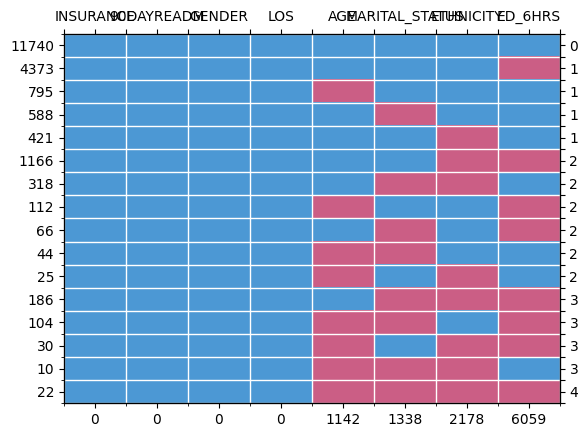

N = 10000



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


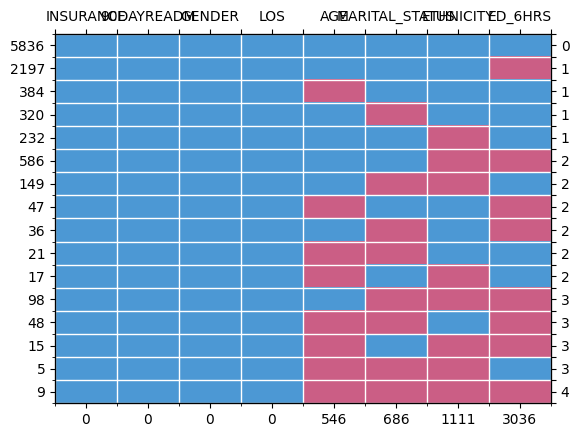

N = 5000



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


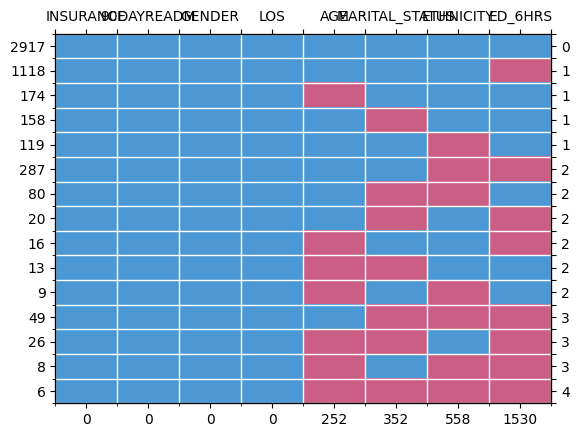

N = 2000



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


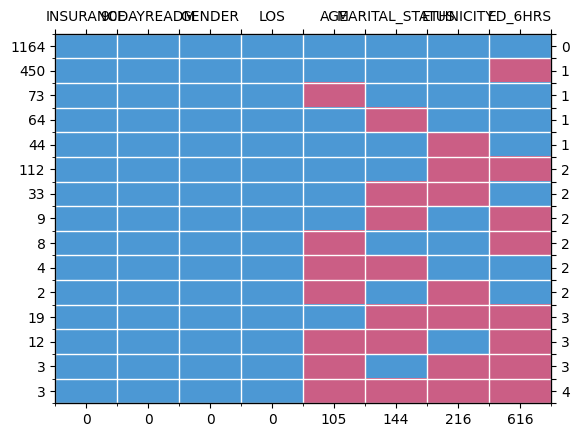

N = 1000



/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


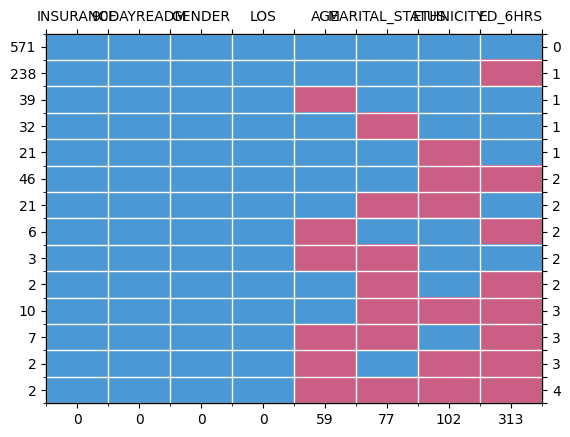

In [25]:
missing_patterns = {}
for n in Ns:
    print("N = {}\n".format(n))
    missing_patterns[n] = mdPatterns().get_patterns(rw_df[n])

In [29]:
pattern_matrix = missing_patterns[Ns[0]].drop(["row_count", "n_missing_values"], axis=1).drop(
    ["n_missing_values_per_col"], axis=0)
pattern_matrix

,INSURANCE,90DAYREADM,GENDER,LOS,AGE,MARITAL_STATUS,ETHNICITY,ED_6HRS
rows_no_missing,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,0
2,1,1,1,1,0,1,1,1
3,1,1,1,1,1,0,1,1
4,1,1,1,1,1,1,0,1
5,1,1,1,1,1,1,0,0
6,1,1,1,1,1,0,0,1
7,1,1,1,1,0,1,1,0
8,1,1,1,1,1,0,1,0
9,1,1,1,1,0,0,1,1


In [30]:
pattern_matrix.values

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0]])

In [32]:
pattern_matrix.to_csv("../../results/figures/report/pattern_matrix_mimic.csv", index=False)

In [38]:
for n in Ns:
    print(missing_patterns[n].groupby("n_missing_values")["row_count"].sum())
    #print(missing_patterns[n].groupby("n_missing_values")["row_count"].sum().sum())

n_missing_values
0        11740
1         6177
2         1731
3          330
4           22
10717         
Name: row_count, dtype: object
n_missing_values
0       5836
1       3133
2        856
3        166
4          9
5379        
Name: row_count, dtype: object
n_missing_values
0       2917
1       1569
2        425
3         83
4          6
2692        
Name: row_count, dtype: object
n_missing_values
0       1164
1        631
2        168
3         34
4          3
1081        
Name: row_count, dtype: object
n_missing_values
0      571
1      330
2       78
3       19
4        2
551       
Name: row_count, dtype: object
